In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [2]:
fatal = pd.read_csv("fatal-police-shootings-data.csv")

Tabela pivot dla zależności rasa-oznaki choroby umysłowej fatal_rm2 

In [3]:
fatal_rm2=fatal.pivot_table(values='name', index='race', columns ='signs_of_mental_illness', aggfunc=len)
fatal_rm2.to_csv('tmp/fatal_rm2.csv',header=True)
fatal_rm2.columns

Index([False, True], dtype='bool', name='signs_of_mental_illness')

In [4]:
def mental_percent(x):
        rate = x[True] * 100 /(x[True]+x[False])
        return round(rate, 2)
        
fatal_rm2["fatal_percent_of_ill[%]"] = fatal_rm2.apply(lambda x: mental_percent(x), axis=1)
fatal_rm2.to_csv("fatal_rm2.csv")  #tabela ofiar z objawami i bez choroby psychicznej podzielona na rasy
fatal_rm2

signs_of_mental_illness  False  True  fatal_percent_of_ill[%]
race                                                         
A                           69    24                    25.81
B                         1114   184                    14.18
H                          745   157                    17.41
N                           64    14                    17.95
O                           37    11                    22.92
W                         1763   713                    28.80

In [5]:
fatal_rm = fatal.groupby(["race", "signs_of_mental_illness"]).agg({"name": "count"})
fatal_rm.reset_index(level=1, inplace=True)
fatal_race=fatal.groupby(['race']).agg({'name':'count'})
fatal_rm=fatal_rm.join(fatal_race,how='left', rsuffix='_all')
fatal_rm

signs_of_mental_illness  name  name_all
race                                         
A                       False    69        93
A                        True    24        93
B                       False  1114      1298
B                        True   184      1298
H                       False   745       902
H                        True   157       902
N                       False    64        78
N                        True    14        78
O                       False    37        48
O                        True    11        48
W                       False  1763      2476
W                        True   713      2476

In [6]:
def percent(x):
        rate = x["name"] * 100 / x["name_all"]
        return round(rate, 2)
        
fatal_rm["fatal_percent_of_ill[%]"] = fatal_rm.apply(lambda x: percent(x), axis=1)
fatal_rm.rename({"name": "count","name_all":"count_all"}, axis=1, inplace=True)
fatal_rm.to_csv("fatal_rm.csv")  #tabela ofiar z objawami i bez choroby psychicznej podzielona na rasy
fatal_rm

signs_of_mental_illness  count  count_all  fatal_percent_of_ill[%]
race                                                                    
A                       False     69         93                    74.19
A                        True     24         93                    25.81
B                       False   1114       1298                    85.82
B                        True    184       1298                    14.18
H                       False    745        902                    82.59
H                        True    157        902                    17.41
N                       False     64         78                    82.05
N                        True     14         78                    17.95
O                       False     37         48                    77.08
O                        True     11         48                    22.92
W                       False   1763       2476                    71.20
W                        True    713       2476                    28.80

In [7]:
fatal_rm_mental = fatal_rm[fatal_rm.signs_of_mental_illness == True]
#fatal_rm_mental.sort_values(by="fatal_percent_of_ill_by_race[%]", ascending=False)
fatal_rm_mental.sort_values(by="fatal_percent_of_ill[%]", ascending=False).to_csv("tmp/fatal_mental.csv")
race = fatal_rm_mental["fatal_percent_of_ill[%]"].idxmax()
percent = fatal_rm_mental["fatal_percent_of_ill[%]"].max()
f"Największy procent ofiar z objawami choroby psychicznej jest wśród rasy {race} i wynosi {percent}%"

'Największy procent ofiar z objawami choroby psychicznej jest wśród rasy W i wynosi 28.8%'

In [8]:
fatal["date"] = pd.to_datetime(fatal["date"])
fatal_day = fatal.join(fatal["date"].dt.day_name(), rsuffix="_day")
fatal_weekday = fatal_day.groupby(["date_day"]).agg({"name": "count"})
fatal_weekday.reset_index(inplace=True)
fatal_weekday.rename(columns={"name": "count"}, inplace=True)
fatal_weekday

date_day  count
0     Friday    761
1     Monday    726
2   Saturday    721
3     Sunday    753
4   Thursday    810
5    Tuesday    816
6  Wednesday    829

<AxesSubplot: xlabel='day', ylabel='number of fatality'>

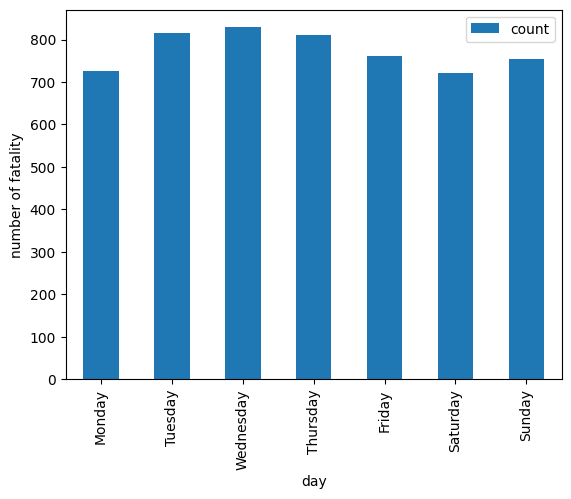

In [9]:
cats = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
]
cat_type = CategoricalDtype(categories=cats, ordered=True)
fatal_weekday["date_day"] = fatal_weekday["date_day"].astype(cat_type)
fatal_weekday = fatal_weekday.groupby(["date_day"]).sum().reindex(cats)
fatal_weekday.reset_index(inplace=True)
fatal_weekday.to_csv("fatal_weekday.csv")
fatal_weekday.plot(x="date_day", y="count", xlabel='day',ylabel='number of fatality',kind="bar")

In [10]:
state_pop = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population", header=0)
state_pop[0].to_csv("tmp/pop_tmp.csv")
pop = state_pop[0].sort_values(by="State")
pop.columns = range(0, 11)
#pop.drop([0, 1, 4, 5, 6, 7, 8, 9, 10], axis=1, inplace=True)
pop=pop.filter(items=[2,3],axis=1)
pop.head()

2        3
23         Alabama  5024279
48          Alaska   733391
54  American Samoa    49710
13         Arizona  7151502
33        Arkansas  3011524

In [11]:
state_name = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations#Table", header=0)
state_name = state_name[0]
state_name.reset_index(inplace=True)
state_name.drop(state_name.index[0:11], inplace=True)
state_name.columns = range(1, 12)
#state_name.drop([1, 3, 4, 5, 6, 8, 9, 10, 11], axis=1, inplace=True)
state_name=state_name.filter(items=[2,7],axis=1)
state_name.to_csv("tmp/state_name.csv")
state_name.head()

2   7
11     Alabama  AL
12      Alaska  AK
13     Arizona  AZ
14    Arkansas  AR
15  California  CA

In [12]:
state_name.columns = [2, 5]
state_name.head(5)

2   5
11     Alabama  AL
12      Alaska  AK
13     Arizona  AZ
14    Arkansas  AR
15  California  CA

In [13]:
pop_by_state = pd.merge(pop, state_name, how="left")
pop_by_state.columns = ["state_full", "pop", "state"]
pop_by_state.sample(5)

state_full        pop state
23                     Maine    1362359    ME
47              Rhode Island    1097379    RI
38            North Carolina   10439388    NC
60                 Wisconsin    5893718    WI
8   Contiguous United States  329260619   NaN

In [14]:
fatal_by_state = fatal.groupby(["state"]).agg({"name": "count"})
fatal_by_state.reset_index(inplace=True)

fatal_by_state_pop = pd.merge(fatal_by_state, pop_by_state, how="left")
fatal_by_state_pop.head()

state  name  state_full       pop
0    AK    39      Alaska    733391
1    AL   104     Alabama   5024279
2    AR    83    Arkansas   3011524
3    AZ   254     Arizona   7151502
4    CA   799  California  39538223

In [15]:
def fatal_per_pop(row):
        rate = 1000 * row["name"] / row["pop"]
        return round(rate, 4)
fatal_by_state_pop["fatal per 1000"] = fatal_by_state_pop.apply(lambda row: fatal_per_pop(row), axis=1)
fatal_by_state_pop.rename({"name": "count"}, axis=1, inplace=True)
fatal_by_state_pop.to_csv("fatality_by_state.csv")
fatal_by_state_pop.head()

state  count  state_full       pop  fatal per 1000
0    AK     39      Alaska    733391          0.0532
1    AL    104     Alabama   5024279          0.0207
2    AR     83    Arkansas   3011524          0.0276
3    AZ    254     Arizona   7151502          0.0355
4    CA    799  California  39538223          0.0202